# Analyse the traffic and provide insights for the operations. 

In [81]:
# Read the file and clean the data
import pandas as pd

df = pd.read_csv('sample_data.csv')

df['datecl'] = pd.to_datetime(df['datecl'], format='%m/%d/%Y')

df['day'] = df['datecl'].dt.day
df['month'] = df['datecl'].dt.month
df['year'] = df['datecl'].dt.year
df.head()

,cl_id,successful,paid_amount,co_name,datecl,payment_method,mid,card_brand,day,month,year
0,5120,0,2000.08,Canada,2021-02-27,Mobile,106,JBC,27,2,2021
1,8318,1,4446.48,Germany,2021-01-19,Bank transfers,266,Amex,19,1,2021
2,9663,1,1862.80,United States,2021-02-05,E-Wallet,75,Visa,5,2,2021
3,1812,0,4403.84,Iran,2021-02-21,E-Wallet,140,MasterCard,21,2,2021
4,9726,0,4652.16,Germany,2021-02-27,Bank transfers,52,Visa,27,2,2021


## Visualize daily trends of the traffic for the period: total number of clicks, successful payments and total paid amount.

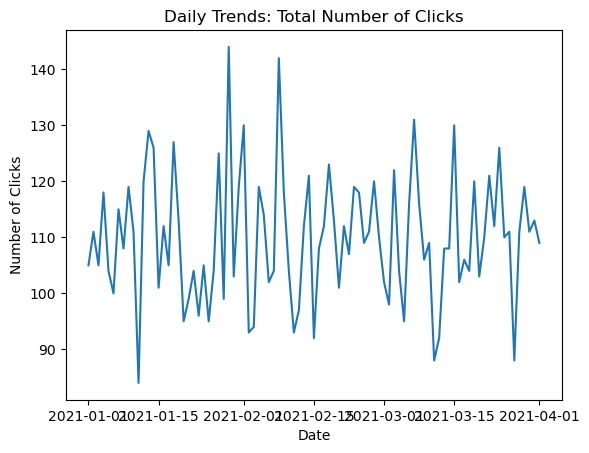

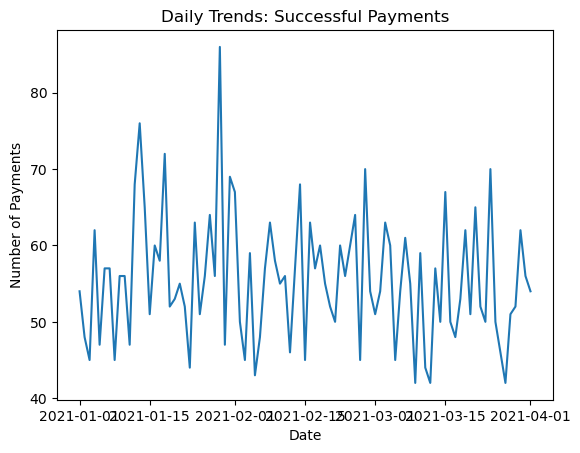

In [66]:
# group the data by date and calculate the total number of clicks, successful payments, and total paid amount
daily_data = df.groupby('datecl').agg({'cl_id': 'count', 'successful': 'sum', 'paid_amount': 'sum'})

daily_data = daily_data.reset_index()

import matplotlib.pyplot as plt

# create a line plot for the total number of clicks
plt.plot(daily_data['datecl'], daily_data['cl_id'])
plt.title('Daily Trends: Total Number of Clicks')
plt.xlabel('Date')
plt.ylabel('Number of Clicks')
plt.show()

# create a line plot for the successful payments
plt.plot(daily_data['datecl'], daily_data['successful'])
plt.title('Daily Trends: Successful Payments')
plt.xlabel('Date')
plt.ylabel('Number of Payments')
plt.show()


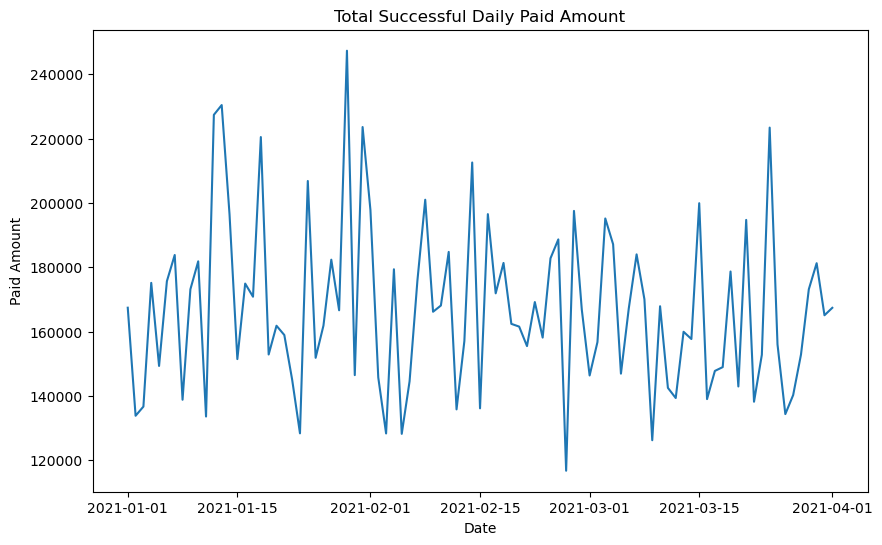

In [82]:
successful_payments = df[df['successful'] == 1]

success_daily_paid = successful_payments.groupby('datecl')['paid_amount'].sum()

# plot the successful daily paid amount
plt.figure(figsize=(10, 6))
plt.plot(success_daily_paid.index, success_daily_paid.values)
plt.title('Total Successful Daily Paid Amount')
plt.xlabel('Date')
plt.ylabel('Paid Amount')
plt.show()

## Task 2.2


In [71]:
# calculate the top 10 merchants by paid amount
top_merchants = successful_payments.groupby('co_name')['paid_amount'].sum().sort_values(ascending=False)[:10]
print(top_merchants)

co_name
Norway            1010047.00
Denmark            986855.08
Australia          939779.36
Netherlands        926107.64
Iran               908760.56
United Kingdom     907950.36
Germany            907744.20
Switzerland        906108.56
Finland            898478.68
Turkey             894412.64
Name: paid_amount, dtype: float64


Top 10 merchants in terms of paid amount are countries shown above. 

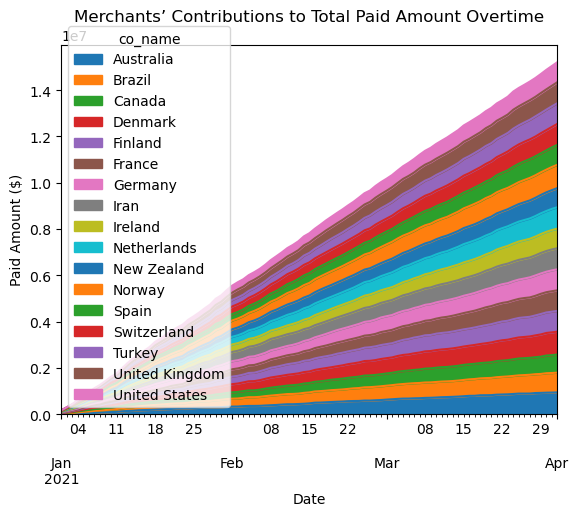

In [72]:
# calculate the merchants' contributions to the total paid amount over time
merchant_contributions = successful_payments.groupby(['datecl', 'co_name'])['paid_amount'].sum().unstack().fillna(0)
merchant_contributions_cumsum = merchant_contributions.cumsum()
merchant_contributions_cumsum.plot.area(stacked=True)
plt.title('Merchants’ Contributions to Total Paid Amount Overtime')
plt.xlabel('Date')
plt.ylabel('Paid Amount ($)')
plt.show()

In [80]:
# calculate the total paid amount for each merchant in each month
merchant_month_data = successful_payments.pivot_table(index='month_year', columns='co_name', values='paid_amount', aggfunc='sum')

merchant_month_data = merchant_month_data.fillna(0)
print(merchant_month_data)

merchant_data = successful_payments.groupby('co_name')['paid_amount'].sum()
print(merchant_data)

co_name     Australia     Brazil     Canada    Denmark    Finland     France  \
month_year                                                                     
2021-01     315949.48  334826.52  263332.92  341039.48  302337.28  299864.88   
2021-02     293516.80  259345.72  257544.40  316889.92  300118.16  260938.80   
2021-03     321742.24  250739.56  251858.16  326787.28  289066.08  324470.04   
2021-04       8570.84    8277.24   10690.12    2138.40    6957.16    3401.04   

co_name       Germany       Iran    Ireland  Netherlands  New Zealand  \
month_year                                                              
2021-01     343840.04  380862.88  312571.36    324775.32    306763.52   
2021-02     287177.04  249696.76  231033.64    285344.92    257435.32   
2021-03     270106.32  273736.00  294594.08    304698.72    244740.52   
2021-04       6620.80    4464.92    9165.28     11288.68     16718.96   

co_name        Norway      Spain  Switzerland     Turkey  United Kingdom  \
mont

Above is the visualisation and the specific figures for the merchants' contributions overtime. For the table, the time unit selected is month due to the large amount of days included in the dataset making it hard to show all the data effectively. The total paid amount is approximately 3.0x(10^7) and the biggest contributors are Norway(1010047.00), Denmark (986855.08) and Australia(939779.36).

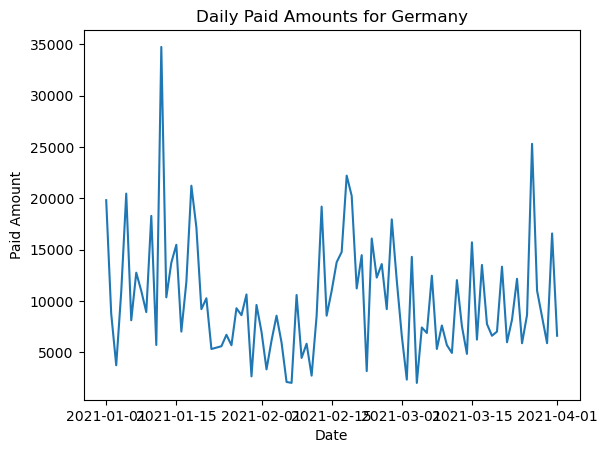

In [92]:
# filter data to include only rows where co_name is "Germany"
successful_payments_germany = successful_payments[successful_payments['co_name'] == 'Germany']

daily_paid_amounts_germany = successful_payments_germany.groupby('datecl')['paid_amount'].sum()

# create a line plot of the daily paid amounts
plt.plot(daily_paid_amounts_germany.index, daily_paid_amounts.values)
plt.title('Daily Paid Amounts for Germany')
plt.xlabel('Date')
plt.ylabel('Paid Amount')
plt.show()

Here is the visualisation for Germany's daily traffic. It can be seen that the figure fluctuates greatly. However, for the first half of the surveyed duration, there is a clear downward trend in the Germany's daily traffic even though the figure briefly reached its peak of approximately 35000 right before January 15th. For the remaining duration, the figure keeps fluctuating widely but remains relatively constant.

## Task 2.3

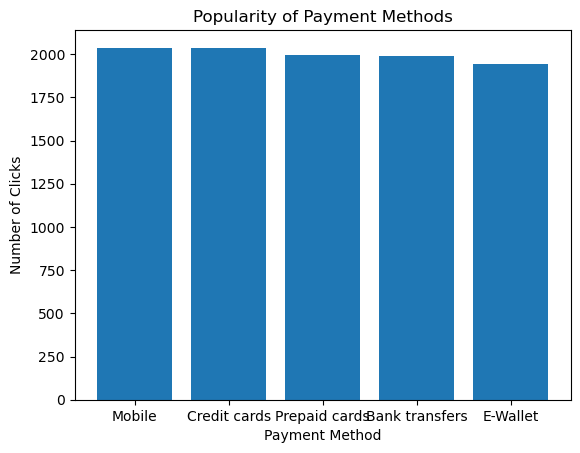

In [34]:
# count the number of clicks for each payment method
click_counts = df['payment_method'].value_counts()

# plot the result as a bar plot
plt.bar(click_counts.index, click_counts.values)
plt.title('Popularity of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Clicks')
plt.show()

In [85]:
# group the data by payment method and sum the clicks for each method
clicks_by_payment_method = df.groupby('payment_method')['successful'].count().reset_index()

clicks_by_payment_method.columns = ['payment_method', 'total_clicks']

print(clicks_by_payment_method)

   payment_method  total_clicks
0  Bank transfers          1990
1    Credit cards          2033
2        E-Wallet          1944
3          Mobile          2037
4   Prepaid cards          1996


In [84]:
# group the data by payment method and successful clicks for each method 
clicks_by_payment_method = successful_payments.groupby('payment_method')['successful'].sum().reset_index()

clicks_by_payment_method.columns = ['payment_method', 'total_clicks']

print(clicks_by_payment_method)

   payment_method  total_clicks
0  Bank transfers          1003
1    Credit cards          1061
2        E-Wallet           982
3          Mobile          1015
4   Prepaid cards           992


## Task 2.4

In [94]:
country_stats = successful_payments.groupby('co_name').agg({'paid_amount': 'sum'})

country_stats_2 = df.groupby('co_name').agg({'successful': 'count'})

merged_df = pd.merge(country_stats, country_stats_2, on='co_name')

print(merged_df)

                paid_amount  successful
co_name                                
Australia         939779.36         608
Brazil            853189.04         563
Canada            783425.60         571
Denmark           986855.08         613
Finland           898478.68         580
France            888674.76         556
Germany           907744.20         637
Iran              908760.56         602
Ireland           847364.36         552
Netherlands       926107.64         620
New Zealand       825658.32         581
Norway           1010047.00         610
Spain             859882.08         586
Switzerland       906108.56         586
Turkey            894412.64         580
United Kingdom    907950.36         580
United States     864295.96         575


In [95]:
# calculate the average paid amount per successful payment for each country
merged_df['avg_paid_amount'] = merged_df['paid_amount'] / merged_df['successful']

# sort the data based on the average paid amount per successful payment and select the top 10 countries
top_10_countries = merged_df.sort_values(by='avg_paid_amount', ascending=False).head(10)

print(top_10_countries)

                paid_amount  successful  avg_paid_amount
co_name                                                 
Norway           1010047.00         610      1655.814754
Denmark           986855.08         613      1609.877781
France            888674.76         556      1598.335899
United Kingdom    907950.36         580      1565.431655
Finland           898478.68         580      1549.101172
Switzerland       906108.56         586      1546.260341
Australia         939779.36         608      1545.689737
Turkey            894412.64         580      1542.090759
Ireland           847364.36         552      1535.080362
Brazil            853189.04         563      1515.433464


The column 'Successful' in this table stands for the total number of clicks.

## Task 2.5

In [96]:
import plotly.express as px
# create a pivot table to calculate the total paid amount for each combination of payment method and card brand
table = pd.pivot_table(successful_payments, values='paid_amount', index='payment_method', columns='card_brand', aggfunc=sum)

df_long = pd.melt(table.reset_index(), id_vars=['payment_method'], value_vars=['Amex', 'JBC', 'MasterCard', 'Visa'], var_name='card_brand', value_name='total_paid_amount')

# create the treemap
fig = px.treemap(df_long, path=['payment_method', 'card_brand'], values='total_paid_amount')

fig.show()